<a href="https://colab.research.google.com/github/RedBatProject/machine-vision/blob/main/Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [8]:
path = "/content/drive/MyDrive/work 85 image 1/"

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [10]:
rf = pd.read_csv("/content/drive/MyDrive/work 85 image 1/res/VGG16+rf+pca2.csv")
prf,trf = rf['predict'].to_numpy(),rf['labels'].to_numpy()

In [27]:
RF = [accuracy_score(trf,prf), precision_score(trf,prf,average='macro'), recall_score(trf,prf,average='macro'), f1_score(trf,prf,average='macro')]

In [28]:
svc = pd.read_csv("/content/drive/MyDrive/work 85 image 1/res/VGG16+svc_2.csv")
prsvc,trsvc = svc['predict'].to_numpy(),svc['labels'].to_numpy()

In [29]:
SVC = [accuracy_score(trsvc,prsvc), precision_score(trsvc,prsvc,average='macro'), recall_score(trsvc,prsvc,average='macro'), f1_score(trsvc,prsvc,average='macro')]

In [30]:
xgb = pd.read_csv("/content/drive/MyDrive/work 85 image 1/res/VGG16+xgb+pca2.csv")
prxgb,trxgb = xgb['predict'].to_numpy(),xgb['labels'].to_numpy()

In [31]:
XGB = [accuracy_score(trxgb,prxgb), precision_score(trxgb,prxgb,average='macro'), recall_score(trxgb,prxgb,average='macro'), f1_score(trxgb,prxgb,average='macro')]


In [32]:
df = pd.DataFrame({
    "VGG16 + SVC":SVC,
    "VGG16 + PCA + XGB":XGB,
    "VGG16 + PCA + RF":RF
})

In [34]:
df.index = ['Accuracy-score','Precision-score','Recal-score','F1-score']

In [35]:
df

,VGG16 + SVC,VGG16 + PCA + XGB,VGG16 + PCA + RF
Accuracy-score,0.486486,0.459459,0.504505
Precision-score,0.465472,0.445563,0.564742
Recal-score,0.492165,0.450753,0.504968
F1-score,0.456414,0.421871,0.470305


In [3]:
k = pd.read_csv("/content/drive/MyDrive/work 85 image 1/VGG16_val_predictions.csv")

In [4]:
k.columns

Index(['True Label', 'Predicted Class', 'Predicted Probability'], dtype='object')

In [5]:
tv,pV = k['True Label'].to_numpy(),k['Predicted Class'].to_numpy()

In [11]:
VGG = [accuracy_score(tv,pV), precision_score(tv,pV,average='macro'), recall_score(tv,pV,average='macro'), f1_score(tv,pV,average='macro')]
VGG

[0.8631578947368421,
 0.8708289638722677,
 0.8543665137210888,
 0.8529306790132387]

In [12]:
k['True Label'].value_counts()

,count
True Label,
2,45
3,44
7,34
0,32
8,31
5,30
6,27
4,22
1,20


In [45]:
k['Predicted Class'].value_counts()

,count
Predicted Class,
7,181
8,156
0,8
3,6
1,4
2,3
6,2
4,1


In [17]:
path = "/content/drive/MyDrive/work 85 image 1/"

In [18]:
import pandas as pd

# Define the data
data = {
    'Model': ['VGG16 + SVC', 'VGG16 + PCA + XGB', 'VGG16 + PCA + RF', 'VGG16'],
    'Accuracy-score': [0.486486, 0.459459, 0.504505, 0.8631578947368421],
    'Precision-score': [0.465472, 0.445563, 0.564742, 0.8708289638722677],
    'Recall-score': [0.492165, 0.450753, 0.504968, 0.8543665137210888],
    'F1-score': [0.456414, 0.421871, 0.470305, 0.8529306790132387],
    'Training Time (s)': [21, 24, 23, 1000],
    'Evaluation Time (s)': [6, 7, 6, 1]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
df.to_csv(path+'results.csv',index=False)


In [19]:
df

,Model,Accuracy-score,Precision-score,Recall-score,F1-score,Training Time (s),Evaluation Time (s)
0,VGG16 + SVC,0.486486,0.465472,0.492165,0.456414,21,6
1,VGG16 + PCA + XGB,0.459459,0.445563,0.450753,0.421871,24,7
2,VGG16 + PCA + RF,0.504505,0.564742,0.504968,0.470305,23,6
3,VGG16,0.863158,0.870829,0.854367,0.852931,1000,1


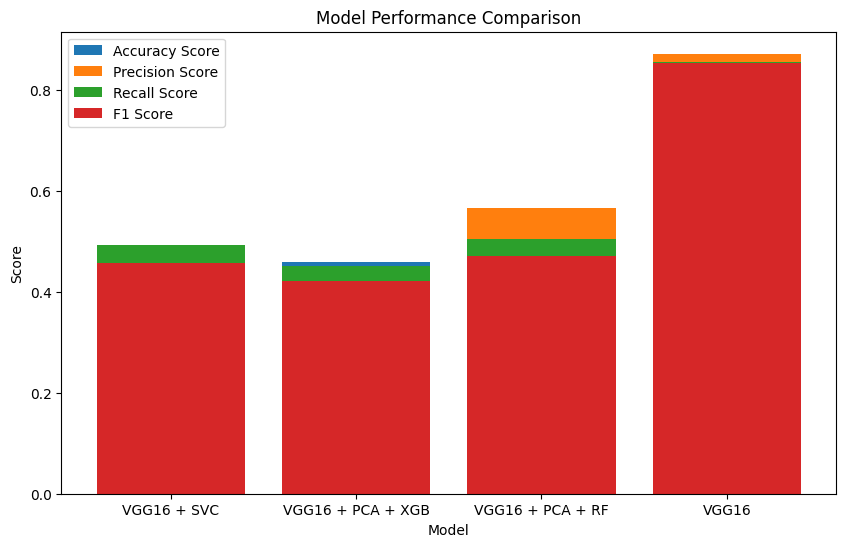

In [20]:
plt.figure(figsize=(10,6))
plt.bar(df['Model'], df['Accuracy-score'], label='Accuracy Score')
plt.bar(df['Model'], df['Precision-score'], label='Precision Score')
plt.bar(df['Model'], df['Recall-score'], label='Recall Score')
plt.bar(df['Model'], df['F1-score'], label='F1 Score')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()


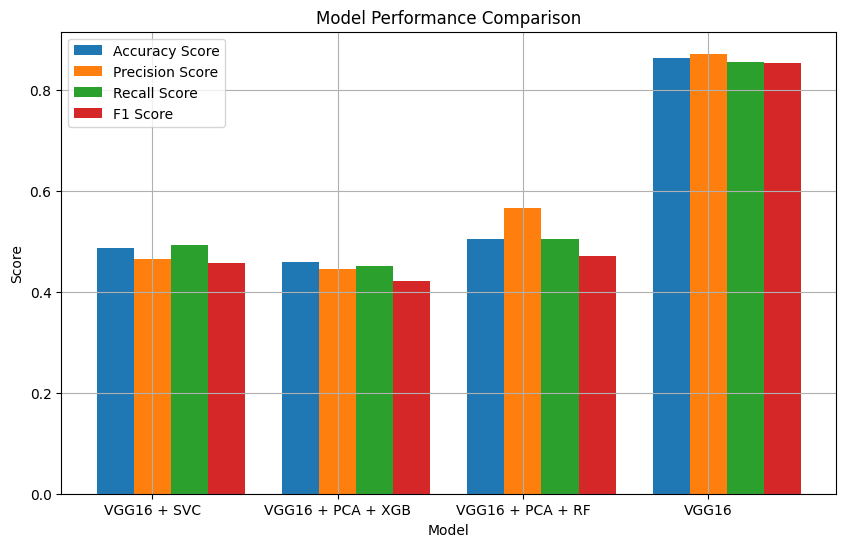

In [23]:
plt.figure(figsize=(10,6))
bar_width = 0.2
x = np.arange(len(df['Model']))

plt.bar(x - bar_width, df['Accuracy-score'], bar_width, label='Accuracy Score')
plt.bar(x, df['Precision-score'], bar_width, label='Precision Score')
plt.bar(x + bar_width, df['Recall-score'], bar_width, label='Recall Score')
plt.bar(x + 2*bar_width, df['F1-score'], bar_width, label='F1 Score')

plt.xticks(x, df['Model'])
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid()
plt.savefig(path+'results.png',bbox_inches='tight')
plt.show()


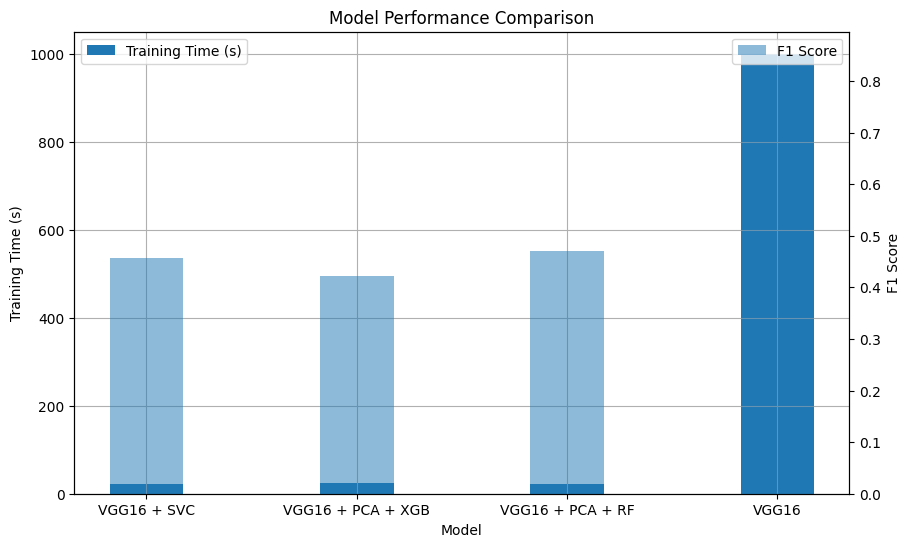

In [29]:
plt.figure(figsize=(10,6))
bar_width = 0.35
x = np.arange(len(df['Model']))

ax1 = plt.subplot()
ax1.bar(x, df['Training Time (s)'], bar_width, label='Training Time (s)')
ax1.set_xlabel('Model')
ax1.set_ylabel('Training Time (s)')
ax1.set_title('Model Performance Comparison')
ax1.legend(loc='upper left')
ax1.grid()

ax2 = ax1.twinx()
ax2.bar(x, df['F1-score'], bar_width, label='F1 Score', alpha=0.5)
ax2.set_ylabel('F1 Score')
ax2.legend(loc='upper right')

plt.xticks(x, df['Model'])
plt.savefig(path+'results_timeVSf1.png',bbox_inches='tight')
plt.show()


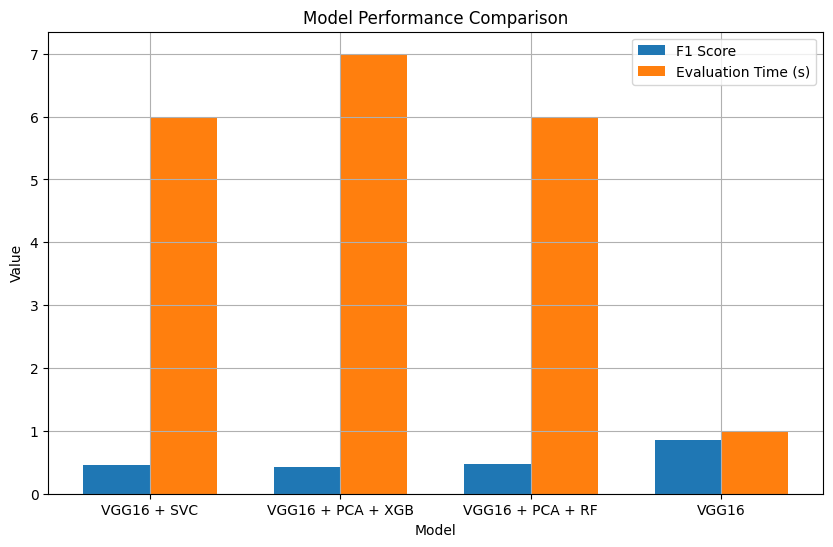

In [27]:
plt.figure(figsize=(10,6))
bar_width = 0.35
x = np.arange(len(df['Model']))

plt.bar(x - bar_width/2, df['F1-score'], bar_width, label='F1 Score')
plt.bar(x + bar_width/2, df['Evaluation Time (s)'], bar_width, label='Evaluation Time (s)')

plt.xticks(x, df['Model'])
plt.xlabel('Model')
plt.ylabel('Value')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid()
plt.savefig(path+'results_time_evaluationVSf1.png',bbox_inches='tight')
plt.show()


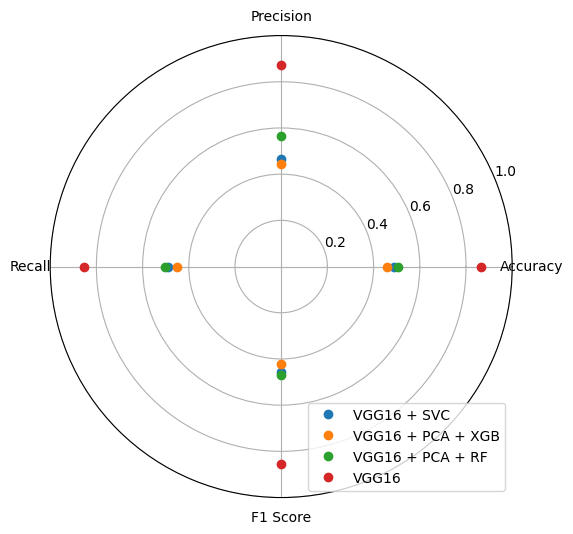

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Define the values for each model
values = [
    [0.486486, 0.465472, 0.492165, 0.456414],
    [0.459459, 0.445563, 0.450753, 0.421871],
    [0.504505, 0.564742, 0.504968, 0.470305],
    [0.863157, 0.870829, 0.854367, 0.852930]
]

# Create the radar chart
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
for i, value in enumerate(values):
    ax.plot(angles, value, 'o', linewidth=2, label=df['Model'][i])
ax.set_thetagrids(angles * 180/np.pi, metrics)
ax.set_ylim(0, 1)
ax.legend()
# plt.grid()
plt.savefig(path+'radaraplots.png',bbox_inches='tight')
plt.show()


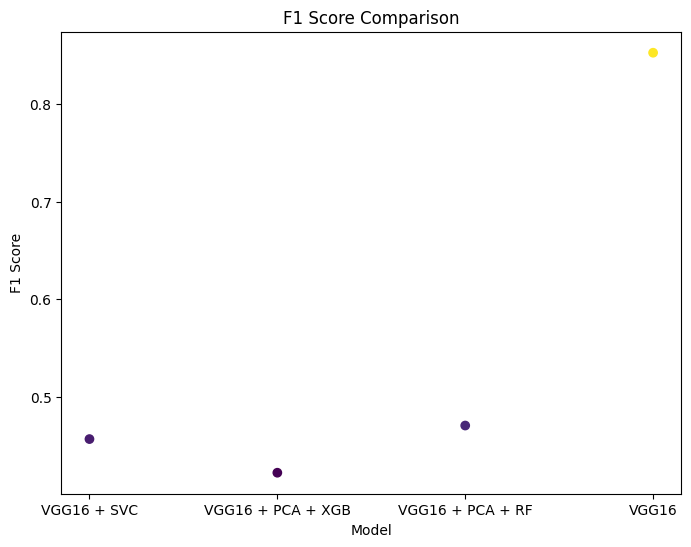

In [33]:
import matplotlib.pyplot as plt

# Create the scatter plot with color gradient
plt.figure(figsize=(8,6))
plt.scatter(df['Model'], df['F1-score'], c=df['F1-score'], cmap='viridis')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.show()


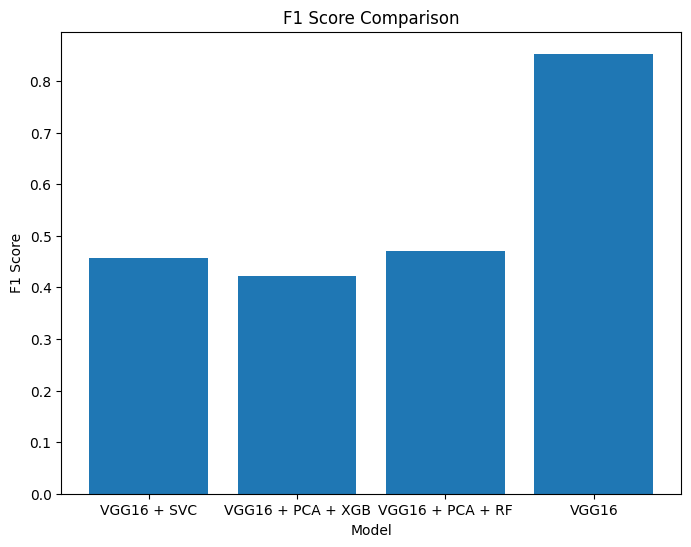

In [34]:
import matplotlib.pyplot as plt

# Create the bar chart with error bars
plt.figure(figsize=(8,6))
plt.bar(df['Model'], df['F1-score'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.show()


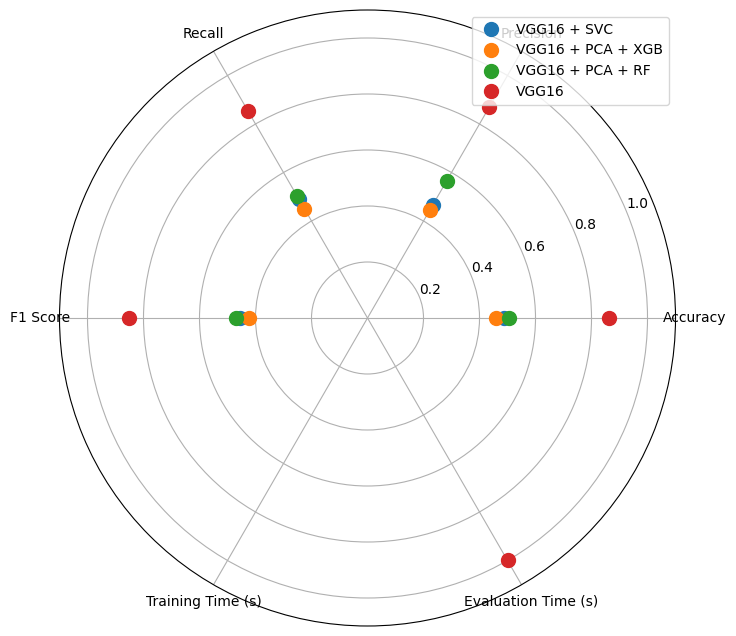

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time (s)', 'Evaluation Time (s)']

# Define the values for each model
values = [
    [0.486486, 0.465472, 0.492165, 0.456414, 21, 6],
    [0.459459, 0.445563, 0.450753, 0.421871, 24, 7],
    [0.504505, 0.564742, 0.504968, 0.470305, 23, 6],
    [0.863157, 0.870829, 0.854367, 0.852930, 1000, 1]
]

# Create the radar chart
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)
for i, value in enumerate(values):
    ax.plot(angles, value, 'o', markersize=10, label=df['Model'][i])
ax.set_thetagrids(angles * 180/np.pi, metrics)
ax.set_ylim(0, 1.1)
ax.legend()
plt.show()


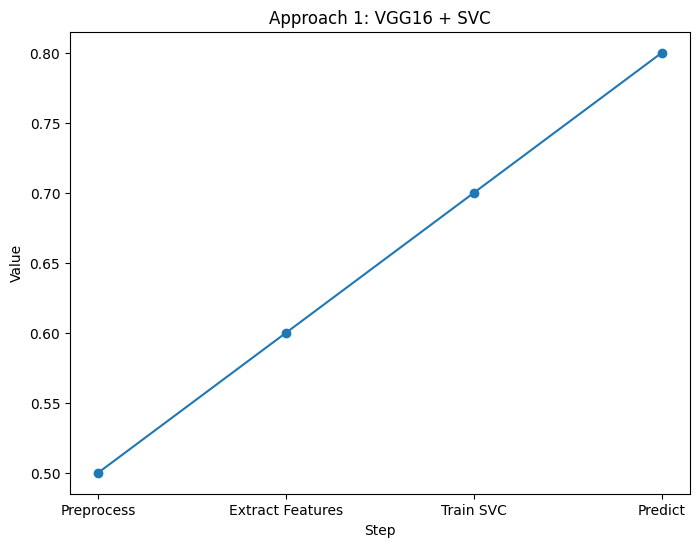

In [36]:
import matplotlib.pyplot as plt

# Define the steps
steps = ['Preprocess', 'Extract Features', 'Train SVC', 'Predict']

# Define the values for each step
values = [0.5, 0.6, 0.7, 0.8]

# Create the plot
plt.figure(figsize=(8,6))
plt.plot(steps, values, 'o-')
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Approach 1: VGG16 + SVC')
plt.show()


In [37]:
# Here's a summary of the different approaches you used:

# **Approach 1: VGG16 + SVC**

# 1. Preprocess the images (resize, convert to floating-point, normalize)
# 2. Extract features from the preprocessed images using VGG16
# 3. Feed the extracted features to an SVC model
# 4. Train and predict using the SVC model

# **Approach 2: VGG16 + PCA + XGB**

# 1. Preprocess the images (resize, convert to floating-point, normalize)
# 2. Extract features from the preprocessed images using VGG16
# 3. Apply PCA to the extracted features for dimension reduction
# 4. Feed the reduced features to an XGB model
# 5. Train and predict using the XGB model

# **Approach 3: VGG16 + PCA + RF**

# 1. Preprocess the images (resize, convert to floating-point, normalize)
# 2. Extract features from the preprocessed images using VGG16
# 3. Apply PCA to the extracted features for dimension reduction
# 4. Feed the reduced features to a Random Forest model
# 5. Train and predict using the Random Forest model

# **Approach 4: VGG16 + Dense Layer with Softmax Classification**

# 1. Preprocess the images (resize, convert to floating-point, normalize)
# 2. Apply augmentation steps (rotation, shift, shear, zoom, flip)
# 3. Extract features from the augmented images using VGG16
# 4. Freeze all layers of VGG16 except the last two layers
# 5. Add a dense layer with softmax classification on top of the VGG16 features
# 6. Train the last two layers of VGG16 and the dense layer for fine-tuning
# 7. Predict using the fine-tuned model

In [38]:
# svc
                                      +---------------+
                                      |  Preprocess  |
                                      |  (resize,     |
                                      |   normalize)  |
                                      +---------------+
                                             |
                                             |
                                             v
                                      +---------------+
                                      |  Extract     |
                                      |  Features    |
                                      |  (VGG16)     |
                                      +---------------+
                                             |
                                             |
                                             v
                                      +---------------+
                                      |  Train SVC   |
                                      |  Model       |
                                      +---------------+
                                             |
                                             |
                                             v
                                      +---------------+
                                      |  Predict     |
                                      |  (SVC Model) |
                                      +---------------+


In [39]:
xgb

                                      +---------------+
                                      |  Preprocess  |
                                      |  (resize,     |
                                      |   normalize)  |
                                      +---------------+
                                             |
                                             |
                                             v
                                      +---------------+
                                      |  Extract     |
                                      |  Features    |
                                      |  (VGG16)     |
                                      +---------------+
                                             |
                                             |
                                             v
                                      +---------------+
                                      |  Apply PCA  |
                                      |  (dimension  |
                                      |   reduction) |
                                      +---------------+
                                             |
                                             |
                                             v
                                      +---------------+
                                      |  Train XGB  |
                                      |  Model       |
                                      +---------------+
                                             |
                                             |
                                             v
                                      +---------------+
                                      |  Predict     |
                                      |  (XGB Model) |
                                      +---------------+


In [40]:
# rf
                                      +---------------+
                                      |  Preprocess  |
                                      |  (resize,     |
                                      |   normalize)  |
                                      +---------------+
                                             |
                                             |
                                             v
                                      +---------------+
                                      |  Extract     |
                                      |  Features    |
                                      |  (VGG16)     |
                                      +---------------+
                                             |
                                             |
                                             v
                                      +---------------+
                                      |  Apply PCA  |
                                      |  (dimension  |
                                      |   reduction) |
                                      +---------------+
                                             |
                                             |
                                             v
                                      +---------------+
                                      |  Train RF   |
                                      |  Model       |
                                      +---------------+
                                             |
                                             |
                                             v
                                      +---------------+
                                      |  Predict     |
                                      |  (RF Model)  |
                                      +---------------+


In [42]:
# vgg
                                      +---------------+
                                      |  Preprocess  |
                                      |  (resize,     |
                                      |   normalize)  |
                                      +---------------+
                                             |
                                             |
                                             v
                                      +---------------+
                                      |  Apply      |
                                      |  Augmentation|
                                      |  (rotation,  |
                                      |   shift,     |
                                      |   shear,     |
                                      |   zoom, flip) |
                                      +---------------+
                                             |
                                             |
                                             v
                                      +---------------+
                                      |  Extract     |
                                      |  Features    |
                                      |  (VGG16)     |
                                      +---------------+
                                             |
                                             |
                                             v
                                      +---------------+
                                      |  Freeze all  |
                                      |  layers of   |
                                      |  VGG16 except|
                                      |  last two    |
                                      +---------------+
                                             |
                                             |
                                             v
                                      +---------------+
                                      |  Add Dense  |
                                      |  Layer with  |
                                      |  Softmax     |
                                      |  Classification|
                                      +---------------+
                                             |
                                             |
                                             v
                                      +---------------+
                                      |  Train last  |
                                      |  two layers  |
                                      |  of VGG16 and|
                                      |  Dense Layer |
                                      +---------------+
                                             |
                                             |
                                             v
                                      +---------------+
                                      |  Predict     |
                                      |  (VGG16 +    |
                                      |   Dense Layer)|
                                      +---------------+


In [ ]:
#                  Start
# ----------------------------------------------------------
#           Resize image to 224x224
# ----------------------------------------------------------
#     Convert image data type to float32
# ----------------------------------------------------------
#    Normalize pixel values by subtracting
#      mean RGB (103.939, 116.779, 123.68)
#      and dividing by standard deviation (1, 1, 1)
# ----------------------------------------------------------
#        **Data Augmentation Begins**
# ----------------------------------------------------------
#         Rotate image (±40 degrees)
# ----------------------------------------------------------
#   Shift image horizontally (±20% of width)
# ----------------------------------------------------------
#    Shift image vertically (±20% of height)
# ----------------------------------------------------------
#      Apply shear transformation (±20%)
# ----------------------------------------------------------
#          Zoom image (±20%)
# ----------------------------------------------------------
#       Flip horizontally (50% probability)
# ----------------------------------------------------------
#    Fill new pixels with nearest neighbor
# ----------------------------------------------------------
#                  End


In [44]:
train = pd.read_csv("/content/drive/MyDrive/work 85 image 1/res/train_classes.csv")

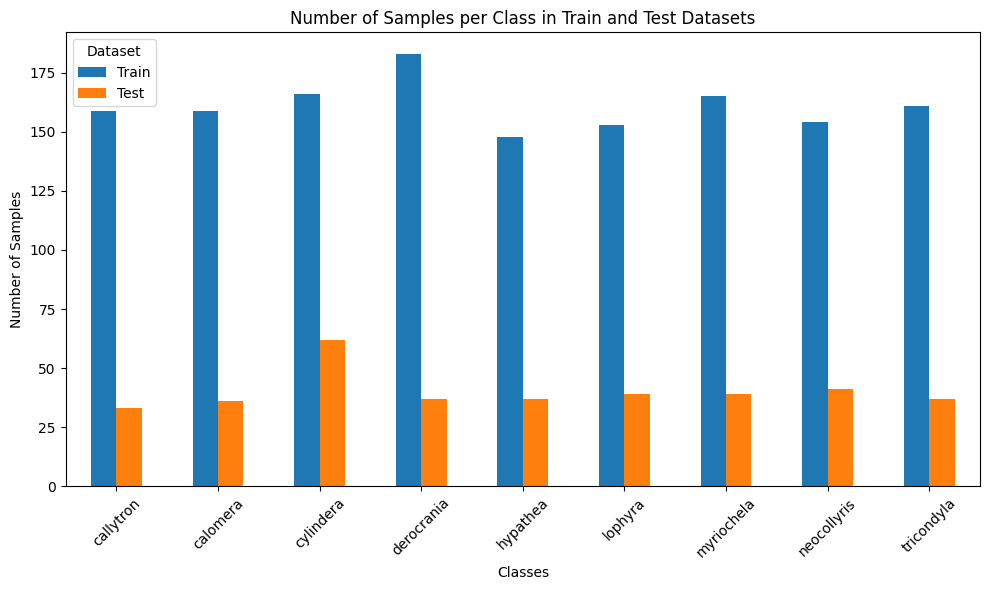

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
train_data = pd.read_csv("/content/drive/MyDrive/work 85 image 1/res/train_classes.csv")  # Replace with your actual train CSV file
test_data = pd.read_csv('/content/drive/MyDrive/work 85 image 1/res/test_classes.csv')    # Replace with your actual test CSV file

# Count the number of samples in each class for train and test
train_class_counts = train_data['classes'].value_counts()
test_class_counts = test_data['classes'].value_counts()

# Create a DataFrame to hold both counts for easier comparison
class_comparison = pd.DataFrame({
    'Train': train_class_counts,
    'Test': test_class_counts
}).fillna(0)  # Fill NaN with 0 in case a class is missing from one of the datasets

# Plotting
class_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Samples per Class in Train and Test Datasets')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.savefig(path+"test_classes_train_classes.png",bbox_inches='tight')

# Show the plot
plt.show()


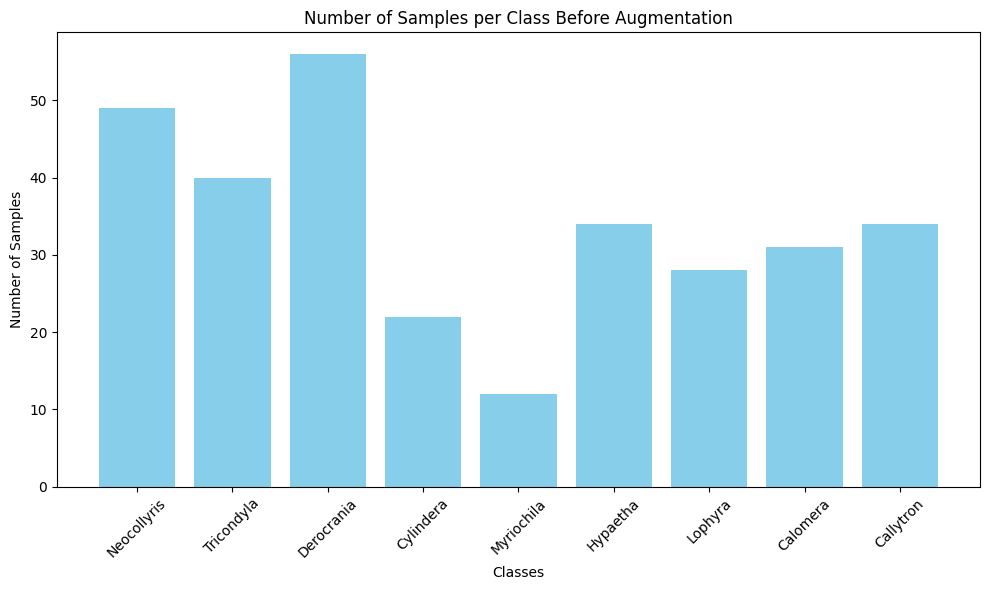

In [50]:
import matplotlib.pyplot as plt

# Initial number of samples before augmentation for each class
classes = ['Neocollyris', 'Tricondyla', 'Derocrania', 'Cylindera', 'Myriochila', 'Hypaetha', 'Lophyra', 'Calomera', 'Callytron']
initial_samples = [49, 40, 56, 22, 12, 34, 28, 31, 34]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classes, initial_samples, color='skyblue')
plt.title('Number of Samples per Class Before Augmentation')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [51]:
class_comparison

,Train,Test
classes,,
callytron,159,33
calomera,159,36
cylindera,166,62
derocrania,183,37
hypathea,148,37
lophyra,153,39
myriochela,165,39
neocollyris,154,41
tricondyla,161,37


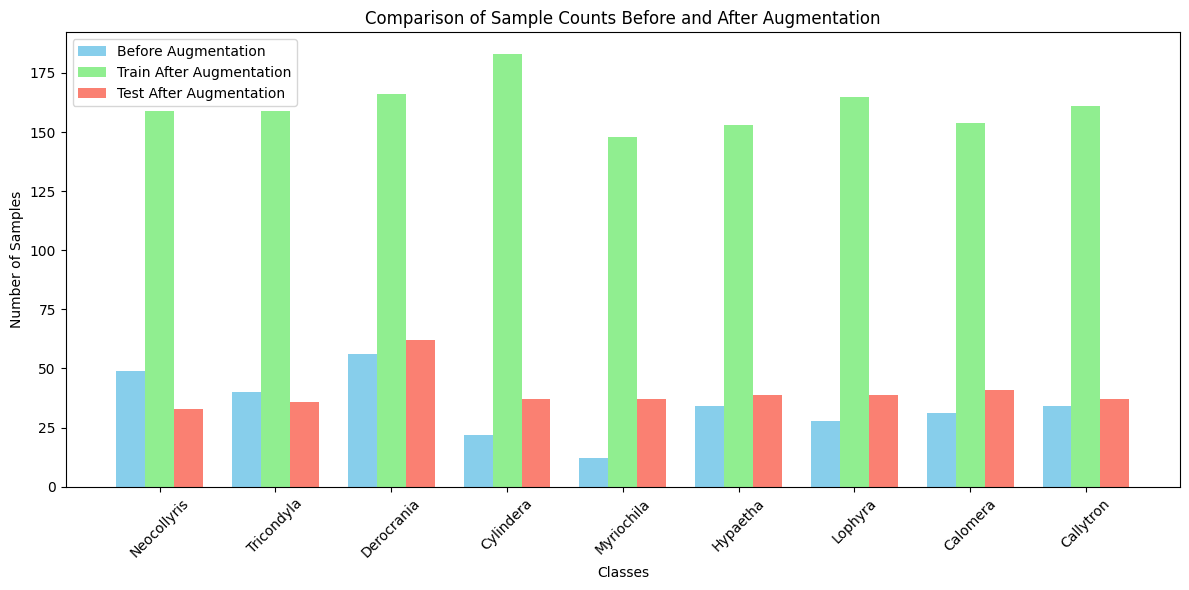

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Initial number of samples before augmentation for each class
classes = ['Neocollyris', 'Tricondyla', 'Derocrania', 'Cylindera', 'Myriochila',
           'Hypaetha', 'Lophyra', 'Calomera', 'Callytron']
initial_samples = [49, 40, 56, 22, 12, 34, 28, 31, 34]

# Number of samples after augmentation for each class
train_samples = [159, 159, 166, 183, 148, 153, 165, 154, 161]
test_samples = [33, 36, 62, 37, 37, 39, 39, 41, 37]

# Setting the bar width and position for groups
bar_width = 0.25
x = np.arange(len(classes))

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, initial_samples, width=bar_width, label='Before Augmentation', color='skyblue')
plt.bar(x, train_samples, width=bar_width, label='Train After Augmentation', color='lightgreen')
plt.bar(x + bar_width, test_samples, width=bar_width, label='Test After Augmentation', color='salmon')

# Adding titles and labels
plt.title('Comparison of Sample Counts Before and After Augmentation')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(x, classes, rotation=45)
plt.legend()

# Tight layout for better spacing
plt.tight_layout()
plt.savefig(path+"samples.png")
# Show the plot
plt.show()


In [54]:
import pandas as pd

# Data preparation
data = {
    'Classes': ['Neocollyris', 'Tricondyla', 'Derocrania', 'Cylindera', 'Myriochila',
                'Hypaetha', 'Lophyra', 'Calomera', 'Callytron'],
    'Samples_Before_Augmentation': [49, 40, 56, 22, 12, 34, 28, 31, 34],
    'Train_After_Augmentation': [159, 159, 166, 183, 148, 153, 165, 154, 161],
    'Test_After_Augmentation': [33, 36, 62, 37, 37, 39, 39, 41, 37]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Displaying the DataFrame
df.to_csv(path+"samples.csv",index=False)


In [56]:
k

,True Label,Predicted Class,Predicted Probability
0,5,6,[0.09277412 0.11108737 0.0341004 0.06021781 0...
1,1,1,[5.7316208e-03 9.3109632e-01 1.3397324e-02 4.0...
2,8,8,[9.4027016e-03 3.8110246e-03 3.0685775e-04 4.2...
3,4,4,[0.00437322 0.03309088 0.02852561 0.01001547 0...
4,7,7,[2.3761283e-04 6.6223004e-07 2.4092315e-05 1.3...
...,...,...,...
280,0,0,[0.35535145 0.1053387 0.03017757 0.12237381 0...
281,8,8,[2.8391888e-03 2.2003143e-03 4.8131408e-04 1.9...
282,6,6,[0.02191601 0.05067351 0.01614413 0.04313365 0...
283,2,2,[7.0676400e-08 3.3029560e-06 9.9861097e-01 1.3...


In [62]:
y_test.reshape(1,-1)

array([[5, 1, 8, 4, 7, 1, 5, 0, 6, 4, 8, 0, 8, 0, 5, 3, 2, 4, 4, 3, 0, 3,
        2, 8, 5, 2, 1, 6, 6, 5, 3, 6, 6, 3, 3, 6, 2, 6, 2, 6, 0, 1, 4, 2,
        3, 8, 7, 2, 5, 3, 4, 1, 1, 3, 8, 3, 4, 4, 0, 8, 7, 2, 0, 7, 5, 0,
        3, 3, 5, 5, 2, 2, 2, 5, 1, 2, 0, 0, 3, 2, 2, 5, 3, 3, 3, 0, 7, 5,
        3, 7, 7, 2, 7, 7, 3, 2, 3, 4, 7, 6, 8, 0, 8, 6, 2, 2, 2, 5, 4, 4,
        3, 5, 2, 8, 8, 4, 2, 7, 8, 8, 5, 0, 6, 3, 0, 6, 0, 6, 8, 2, 1, 1,
        3, 0, 8, 2, 3, 3, 6, 7, 5, 0, 7, 2, 5, 7, 0, 4, 3, 7, 3, 4, 0, 3,
        1, 8, 3, 0, 6, 7, 1, 8, 6, 1, 7, 2, 0, 7, 2, 2, 6, 3, 5, 5, 3, 7,
        8, 2, 7, 3, 5, 7, 0, 6, 4, 7, 1, 7, 8, 7, 6, 3, 5, 4, 1, 2, 3, 6,
        6, 4, 8, 2, 2, 4, 2, 1, 7, 1, 5, 3, 4, 8, 2, 8, 2, 1, 8, 5, 1, 6,
        2, 2, 4, 4, 2, 8, 8, 5, 2, 0, 8, 2, 3, 7, 5, 0, 0, 1, 5, 2, 1, 7,
        8, 3, 5, 3, 3, 4, 7, 6, 8, 5, 8, 7, 2, 2, 3, 7, 0, 6, 5, 3, 7, 2,
        6, 2, 3, 3, 0, 8, 0, 5, 7, 3, 0, 7, 3, 6, 0, 0, 0, 8, 6, 2, 7]])

In [73]:
s = k['Predicted Probability'].to_list()[0]

In [72]:
import re

In [88]:
[float(i) for i in re.sub(r'[^\d.-]+', ' ', s).strip().split(' ')]

[0.09277412,
 0.11108737,
 0.0341004,
 0.06021781,
 0.12867409,
 0.12803732,
 0.27304044,
 0.05477187,
 0.11729655]

In [94]:
p = np.zeros((k.shape[0],9))

In [95]:
# re.findall(r'[-+]?\d*\.\d+e[-+]?\d+|[-+]?\d*\.\d+|[-+]?\d+', j)

In [96]:
# re.sub(r'[^\d.-]+', ' ', j).strip()

In [97]:
for jnd,j in enumerate(k['Predicted Probability'].to_list()):
    v = np.array(re.findall(r'[-+]?\d*\.\d+e[-+]?\d+|[-+]?\d*\.\d+|[-+]?\d+', j))
    p[jnd] = v

In [98]:
p

array([[9.2774120e-02, 1.1108737e-01, 3.4100400e-02, ..., 2.7304044e-01,
        5.4771870e-02, 1.1729655e-01],
       [5.7316208e-03, 9.3109632e-01, 1.3397324e-02, ..., 1.7636829e-03,
        7.4095611e-04, 1.3686358e-03],
       [9.4027016e-03, 3.8110246e-03, 3.0685775e-04, ..., 6.8009123e-03,
        5.2145425e-02, 9.2422926e-01],
       ...,
       [2.1916010e-02, 5.0673510e-02, 1.6144130e-02, ..., 7.4533504e-01,
        6.0329700e-03, 2.1342200e-02],
       [7.0676400e-08, 3.3029560e-06, 9.9861097e-01, ..., 1.0425038e-06,
        1.3602643e-03, 7.0433595e-07],
       [3.8462076e-03, 1.3497718e-04, 6.5968366e-04, ..., 4.8296847e-03,
        8.8321710e-01, 9.7409964e-02]])

In [103]:
y_test.reshape(-1,1)

array([[5],
       [1],
       [8],
       [4],
       [7],
       [1],
       [5],
       [0],
       [6],
       [4],
       [8],
       [0],
       [8],
       [0],
       [5],
       [3],
       [2],
       [4],
       [4],
       [3],
       [0],
       [3],
       [2],
       [8],
       [5],
       [2],
       [1],
       [6],
       [6],
       [5],
       [3],
       [6],
       [6],
       [3],
       [3],
       [6],
       [2],
       [6],
       [2],
       [6],
       [0],
       [1],
       [4],
       [2],
       [3],
       [8],
       [7],
       [2],
       [5],
       [3],
       [4],
       [1],
       [1],
       [3],
       [8],
       [3],
       [4],
       [4],
       [0],
       [8],
       [7],
       [2],
       [0],
       [7],
       [5],
       [0],
       [3],
       [3],
       [5],
       [5],
       [2],
       [2],
       [2],
       [5],
       [1],
       [2],
       [0],
       [0],
       [3],
       [2],
       [2],
       [5],
       [3],
    

In [105]:
num_classes = max(k['True Label'].to_numpy()) + 1  # +1 because classes start at 0

# Create a one-hot encoded array
one_hot = np.eye(num_classes)[k['True Label'].to_numpy()]

In [108]:
one_hot.shape

(285, 9)

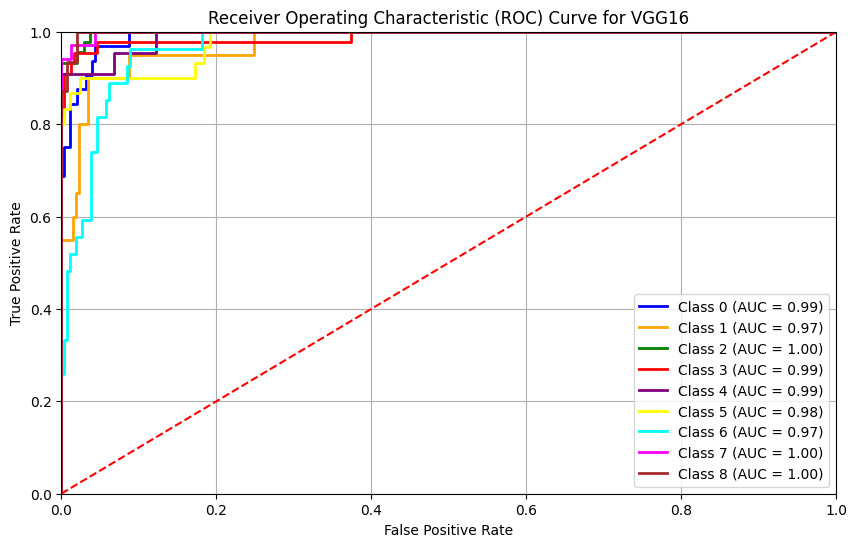

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
# from sklearn.datasets import make_multiclass_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Step 4: Predict probabilities
y_score = p
y_test = k['True Label'].to_numpy()
n_classes = 9
# Step 5: Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(one_hot[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    data = {
        'fpr':fpr[i],
        'tpr':tpr[i],
        'roc':roc_auc[i]
    }
    pd.DataFrame(data).to_csv(path+f"class id {i}_fpr_tpr.csv",index=False)


# Step 6: Plotting the ROC curves
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'cyan', 'magenta', 'brown']


for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for random chance
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Step 7: Add titles and labels
plt.title('Receiver Operating Characteristic (ROC) Curve for VGG16')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right')
plt.grid()
plt.savefig(path+'roc.png',bbox_inches='tight')

plt.show()


In [112]:
path+f"class id {i}_fpr_tpr.csv"

'/content/drive/MyDrive/work 85 image 1/class id 8_fpr_tpr.csv'